### EDA on a dataset

In [206]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
df= pd.read_csv('amazon_sales_2025_INR.csv')


In [208]:
df.head()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India


In [209]:
df.tail()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
14995,ORD114995,2025-04-12,CUST2822,Beauty,Lipstick,4,36421.54,145686.16,UPI,Delivered,1,Never buying again,Gujarat,India
14996,ORD114996,2025-08-29,CUST6143,Beauty,Shampoo,4,18158.02,72632.08,Debit Card,Delivered,4,Satisfied with the product,Meghalaya,India
14997,ORD114997,2025-01-27,CUST6747,Books,Science Textbook,1,38864.05,38864.05,UPI,Delivered,1,Waste of money,Sikkim,India
14998,ORD114998,2025-06-21,CUST2748,Beauty,Hair Dryer,3,32658.62,97975.86,Cash on Delivery,Pending,3,Okay product,Himachal Pradesh,India
14999,ORD114999,2025-08-07,CUST9174,Home & Kitchen,Mixer Grinder,5,45005.57,225027.85,Cash on Delivery,Pending,4,Good quality,Bihar,India


In [210]:
df.shape

(15000, 14)

In [211]:
df.columns

Index(['Order_ID', 'Date', 'Customer_ID', 'Product_Category', 'Product_Name',
       'Quantity', 'Unit_Price_INR', 'Total_Sales_INR', 'Payment_Method',
       'Delivery_Status', 'Review_Rating', 'Review_Text', 'State', 'Country'],
      dtype='object')

In [212]:
df.isnull().sum()

Order_ID            0
Date                0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price_INR      0
Total_Sales_INR     0
Payment_Method      0
Delivery_Status     0
Review_Rating       0
Review_Text         0
State               0
Country             0
dtype: int64

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          15000 non-null  object 
 1   Date              15000 non-null  object 
 2   Customer_ID       15000 non-null  object 
 3   Product_Category  15000 non-null  object 
 4   Product_Name      15000 non-null  object 
 5   Quantity          15000 non-null  int64  
 6   Unit_Price_INR    15000 non-null  float64
 7   Total_Sales_INR   15000 non-null  float64
 8   Payment_Method    15000 non-null  object 
 9   Delivery_Status   15000 non-null  object 
 10  Review_Rating     15000 non-null  int64  
 11  Review_Text       15000 non-null  object 
 12  State             15000 non-null  object 
 13  Country           15000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.6+ MB


In [214]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame, e.g., loaded already
# df = pd.read_csv('your_amazon_sales.csv')

# 1. Add null values randomly to selected columns
np.random.seed(42) # for reproducibility
null_frac = 0.05   # 5% of each column as nulls

for col in ['Quantity', 'Unit_Price_INR', 'Total_Sales_INR', 'Review_Rating', 'Review_Text']:
    n_nulls = int(len(df) * null_frac)
    idx = np.random.choice(df.index, n_nulls, replace=False)
    df.loc[idx, col] = np.nan

# 2. Inject outliers into numeric columns
n_outliers = 15  # number of extreme outliers to add per column

for col in ['Quantity', 'Unit_Price_INR', 'Total_Sales_INR']:
    idx = np.random.choice(df.dropna(subset=[col]).index, n_outliers, replace=False)
    # Choose a large multiplier for outliers. For Quantity, make extremely high, rest even higher.
    if col == 'Quantity':
        df.loc[idx, col] = df[col].mean() + 20*df[col].std()  # Add large value
    else:
        df.loc[idx, col] = df[col].mean() + 30*df[col].std()  # Add even larger outliers

# For Review_Rating, set some to out-of-bounds (e.g., 99)
idx = np.random.choice(df.dropna(subset=['Review_Rating']).index, 7, replace=False)
df.loc[idx, 'Review_Rating'] = 99

# For demonstration: you can now check presence of nulls/outliers
print(df.isnull().sum())
print(df.describe())


Order_ID              0
Date                  0
Customer_ID           0
Product_Category      0
Product_Name          0
Quantity            750
Unit_Price_INR      750
Total_Sales_INR     750
Payment_Method        0
Delivery_Status       0
Review_Rating       750
Review_Text         750
State                 0
Country               0
dtype: int64
           Quantity  Unit_Price_INR  Total_Sales_INR  Review_Rating
count  14250.000000    14250.000000     1.425000e+04   14250.000000
mean       3.009530    25439.775705     7.638161e+04       3.087018
std        1.692353    20109.984337     8.278990e+04       2.551265
min        1.000000      204.050000     2.040500e+02       1.000000
25%        2.000000    12530.970000     2.718152e+04       2.000000
50%        3.000000    24935.370000     5.729357e+04       3.000000
75%        4.000000    37596.000000     1.123891e+05       4.000000
max       31.386909   457574.131063     1.855141e+06      99.000000


In [215]:
categorical_cols=df.select_dtypes('object').columns.tolist()
numerical_cols=df.select_dtypes('number').columns.tolist()
print(categorical_cols,'\n',numerical_cols)

['Order_ID', 'Date', 'Customer_ID', 'Product_Category', 'Product_Name', 'Payment_Method', 'Delivery_Status', 'Review_Text', 'State', 'Country'] 
 ['Quantity', 'Unit_Price_INR', 'Total_Sales_INR', 'Review_Rating']


In [216]:
duplicate_count=df.duplicated().sum()
duplicate_count

np.int64(0)

In [217]:
df.isnull().sum()

Order_ID              0
Date                  0
Customer_ID           0
Product_Category      0
Product_Name          0
Quantity            750
Unit_Price_INR      750
Total_Sales_INR     750
Payment_Method        0
Delivery_Status       0
Review_Rating       750
Review_Text         750
State                 0
Country               0
dtype: int64

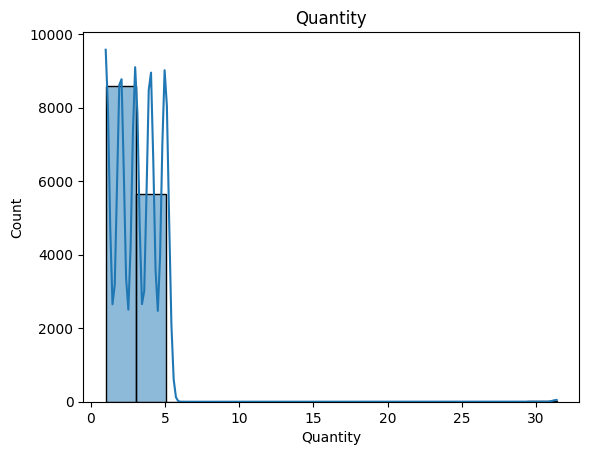

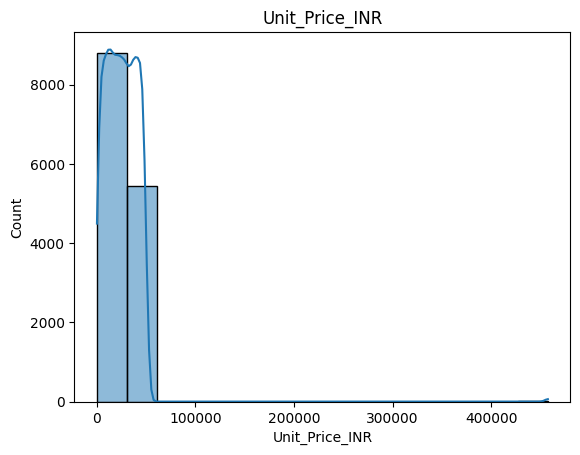

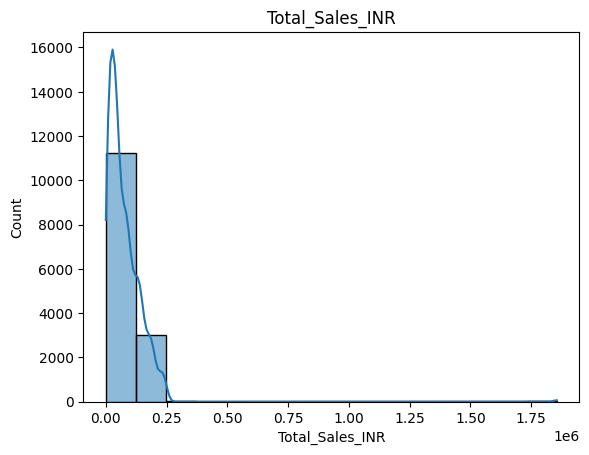

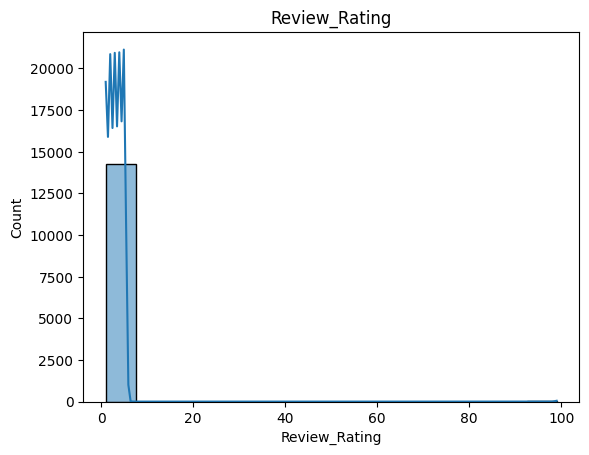

In [218]:
for col in numerical_cols:
    sns.histplot(df[col],bins=15,kde=True)
    plt.title(col)
    plt.show()


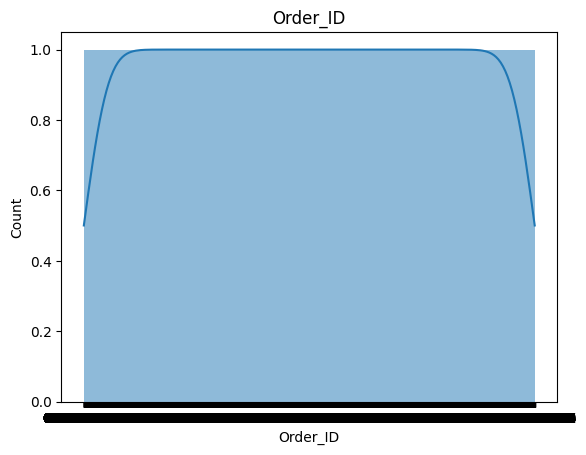

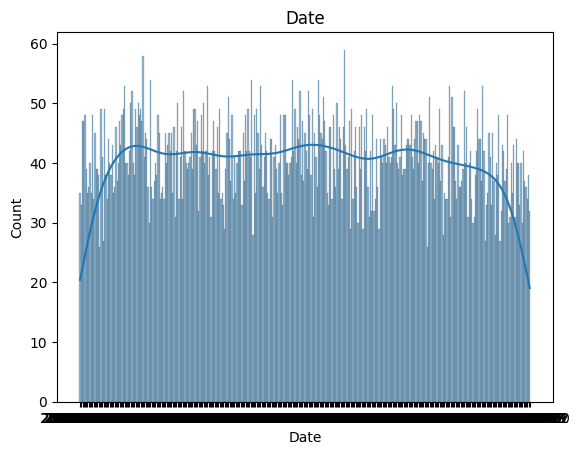

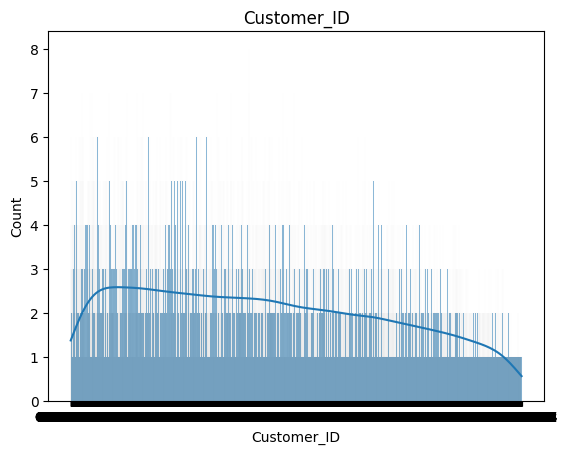

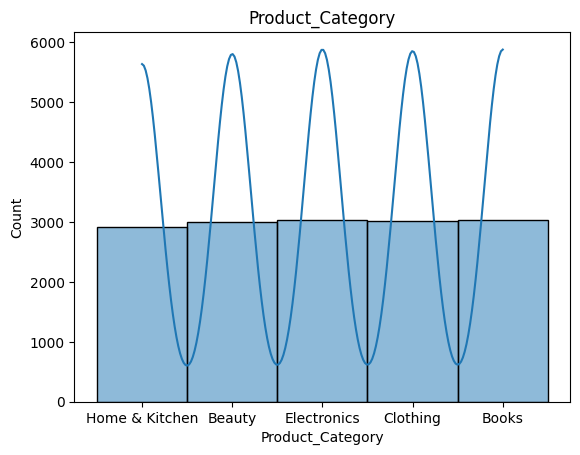

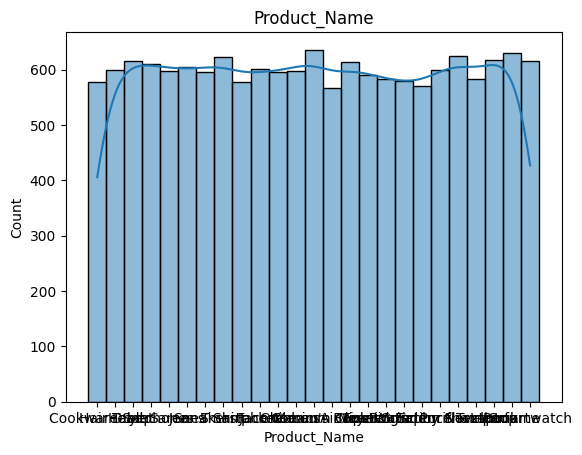

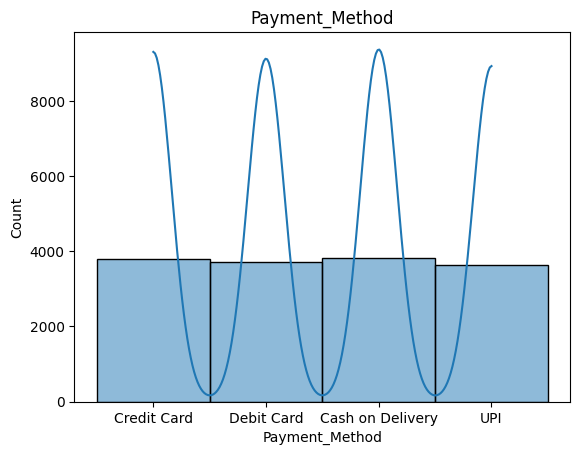

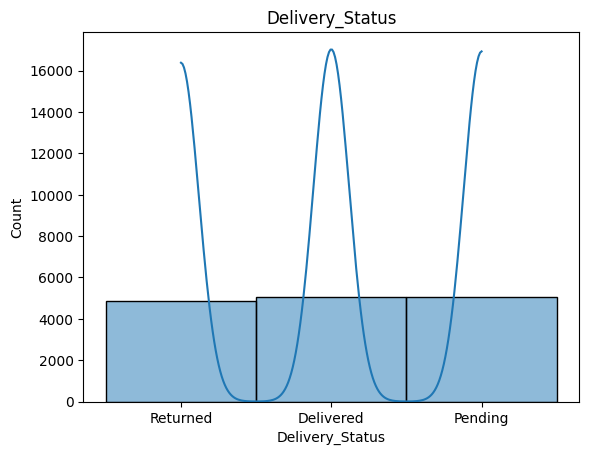

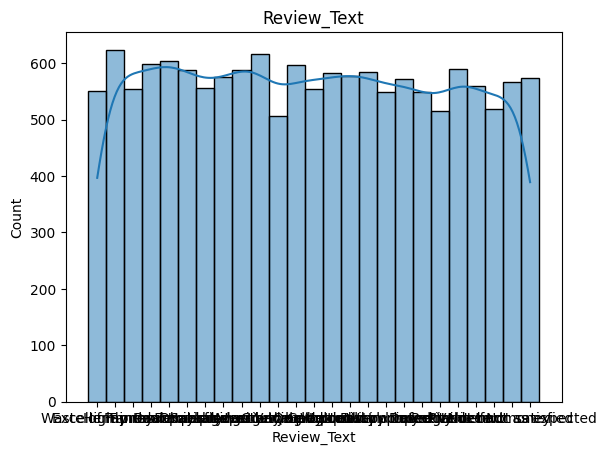

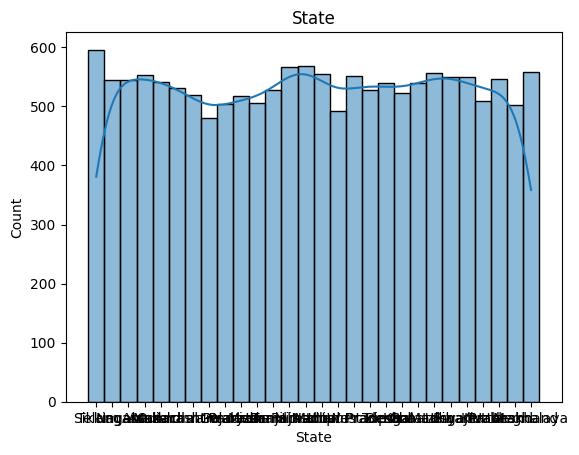

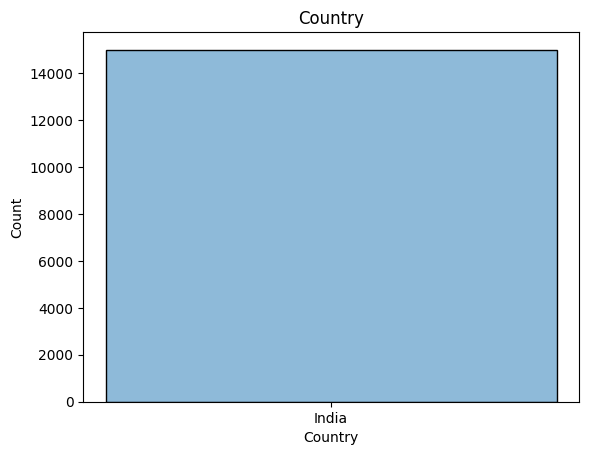

In [219]:
for col in categorical_cols:
    sns.histplot(df[col],bins=15,kde=True)
    plt.title(col)
    plt.show()

<Axes: >

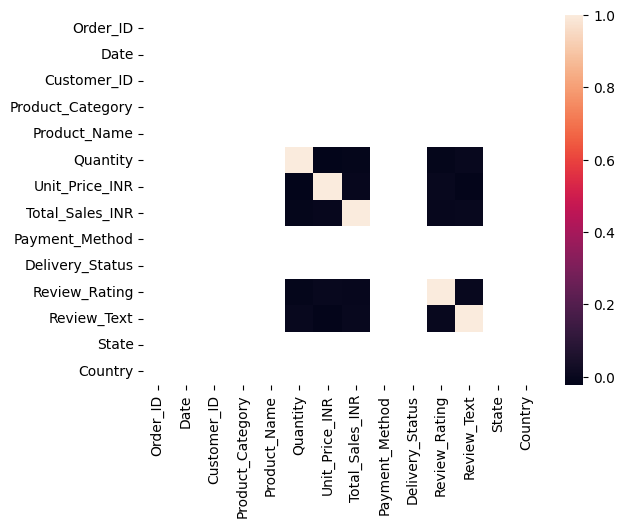

In [220]:
sns.heatmap(df.isnull().corr())

In [221]:
df['Quantity'].isnull().sum()

np.int64(750)

In [222]:
df['Quantity']

0        2.0
1        1.0
2        3.0
3        5.0
4        5.0
        ... 
14995    4.0
14996    4.0
14997    1.0
14998    NaN
14999    5.0
Name: Quantity, Length: 15000, dtype: float64

In [223]:
df['Quantity']=df['Quantity'].fillna(df['Quantity'].mean())
df['Quantity'].isnull().sum()

np.int64(0)

In [224]:
df['Unit_Price_INR']

0        25574.41
1        19361.41
2             NaN
3        38145.72
4        45940.98
           ...   
14995    36421.54
14996    18158.02
14997    38864.05
14998    32658.62
14999    45005.57
Name: Unit_Price_INR, Length: 15000, dtype: float64

In [225]:
df['Unit_Price_INR']=df['Unit_Price_INR'].fillna(df['Unit_Price_INR'].median())
df['Unit_Price_INR'].isnull().sum()

np.int64(0)

In [226]:
df['Total_Sales_INR'].isna().sum()

np.int64(750)

In [227]:
df['Total_Sales_INR']=df['Total_Sales_INR'].fillna(df['Total_Sales_INR'].median())

In [228]:
df['Review_Rating']

0        1.0
1        5.0
2        3.0
3        5.0
4        5.0
        ... 
14995    1.0
14996    4.0
14997    1.0
14998    3.0
14999    4.0
Name: Review_Rating, Length: 15000, dtype: float64

In [229]:
df['Review_Rating']=df['Review_Rating'].fillna(df['Review_Rating'].median())

In [230]:
df.isnull().sum()

Order_ID              0
Date                  0
Customer_ID           0
Product_Category      0
Product_Name          0
Quantity              0
Unit_Price_INR        0
Total_Sales_INR       0
Payment_Method        0
Delivery_Status       0
Review_Rating         0
Review_Text         750
State                 0
Country               0
dtype: int64

In [231]:
df['Review_Text']=df['Review_Text'].fillna(df['Review_Text'].mode()[0])

d:\Data_Science\data-science\.venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\Data_Science\data-science\.venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

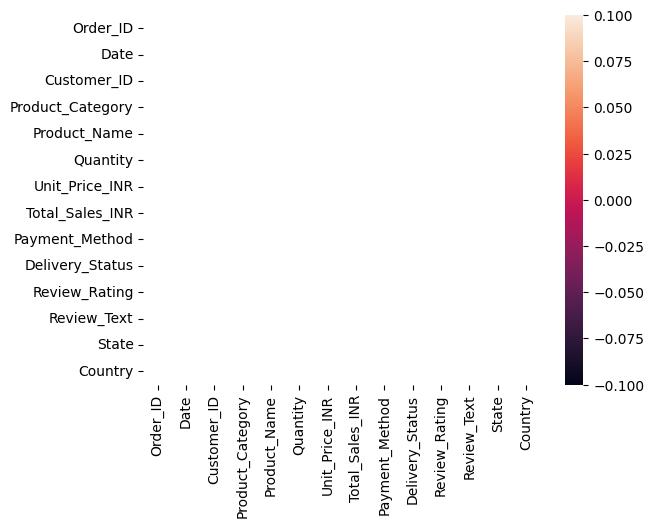

In [232]:
sns.heatmap(df.isna().corr())

In [233]:
df['Review_Text'].isnull().sum()

np.int64(0)

In [234]:
numeric=df.select_dtypes('number')
numeric

,Quantity,Unit_Price_INR,Total_Sales_INR,Review_Rating
0,2.00000,25574.41,51148.82,1.0
1,1.00000,19361.41,19361.41,5.0
2,3.00000,24935.37,115428.66,3.0
3,5.00000,38145.72,190728.60,5.0
4,5.00000,45940.98,229704.90,5.0
...,...,...,...,...
14995,4.00000,36421.54,145686.16,1.0
14996,4.00000,18158.02,72632.08,4.0
14997,1.00000,38864.05,38864.05,1.0
14998,3.00953,32658.62,97975.86,3.0


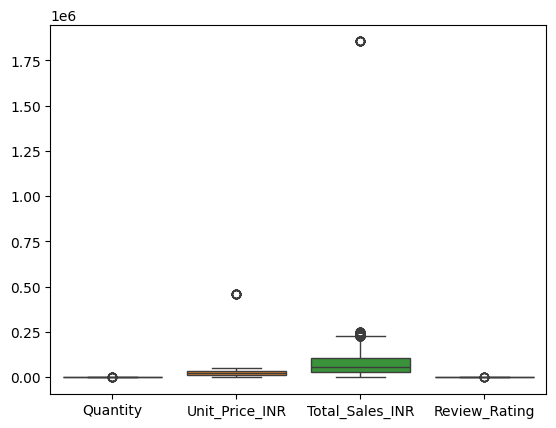

In [235]:
sns.boxplot(numeric)
plt.show()

#### IQR method:

In [236]:

def outlier_det(col):
    outliers=[]
    q1=np.percentile(df[col],25,method='midpoint')
    q3=np.percentile(df[col],75,method='midpoint')
    iqr=q3-q1
    print(f'for column: {col} ')
    print(f'q1 : {q1}')
    print(f'q3 : {q3}')
    print(f'IQR : {iqr}')
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    outlier_condition=(df[col]<lower)|(df[col]>upper)
    outliers=df.loc[outlier_condition,col]
    print(f'outliers of {col} is {outliers}')
    outlier_index=df.index[outlier_condition]
    return outliers,outlier_index,lower,upper

    

In [237]:
print(df['Quantity'].min())
print(df['Quantity'].max())

1.0
31.38690854883565


In [238]:
print(df['Unit_Price_INR'].min())
print(df['Unit_Price_INR'].max())

204.05
457574.13106266747


<Axes: >

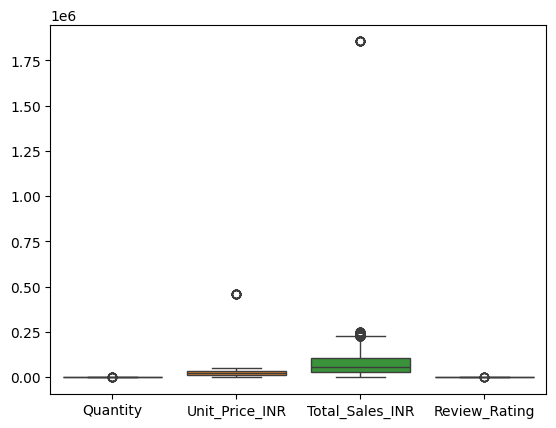

In [239]:
sns.boxplot(numeric)

<Axes: ylabel='Total_Sales_INR'>

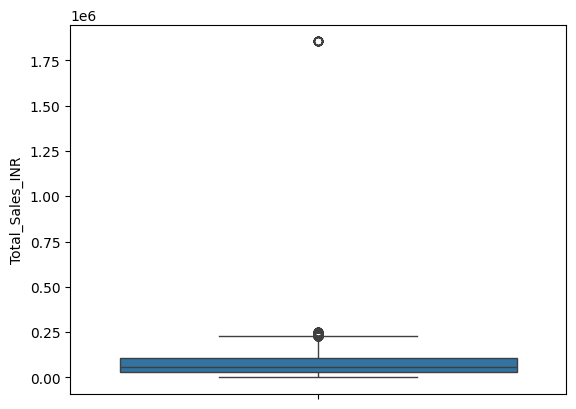

In [240]:
sns.boxplot(df['Total_Sales_INR'])

In [241]:
outlier_sales,outlier_sales_index,lower_sales,upper_sales=outlier_det('Total_Sales_INR')
print(outlier_sales)
print(outlier_sales_index)
print(lower_sales)
print(upper_sales)

for column: Total_Sales_INR 
q1 : 28523.440000000002
q3 : 107903.39499999999
IQR : 79379.95499999999
outliers of Total_Sales_INR is 4        229704.90
149      246125.50
158      243688.95
192      234798.20
216      228286.45
           ...    
14819    227210.50
14823    233352.10
14840    230233.20
14848    236732.45
14875    243057.80
Name: Total_Sales_INR, Length: 296, dtype: float64
4        229704.90
149      246125.50
158      243688.95
192      234798.20
216      228286.45
           ...    
14819    227210.50
14823    233352.10
14840    230233.20
14848    236732.45
14875    243057.80
Name: Total_Sales_INR, Length: 296, dtype: float64
Index([    4,   149,   158,   192,   216,   263,   319,   434,   456,   545,
       ...
       14641, 14723, 14730, 14733, 14737, 14819, 14823, 14840, 14848, 14875],
      dtype='int64', length=296)
-90546.49249999998
226973.32749999996


In [242]:
print(len(outlier_sales))

296


In [243]:
len(df['Total_Sales_INR'])


15000

In [244]:
df['Quantity'].unique()

array([ 2.        ,  1.        ,  3.        ,  5.        ,  4.        ,
        3.00953008, 31.38690855])

In [245]:
df['Total_Sales_INR']=df['Total_Sales_INR'].clip(lower=lower_sales,upper=upper_sales)

<Axes: ylabel='Total_Sales_INR'>

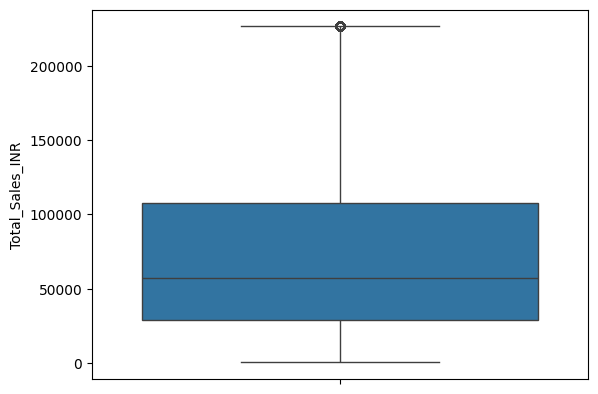

In [246]:
sns.boxplot(df['Total_Sales_INR'])

<Axes: ylabel='Quantity'>

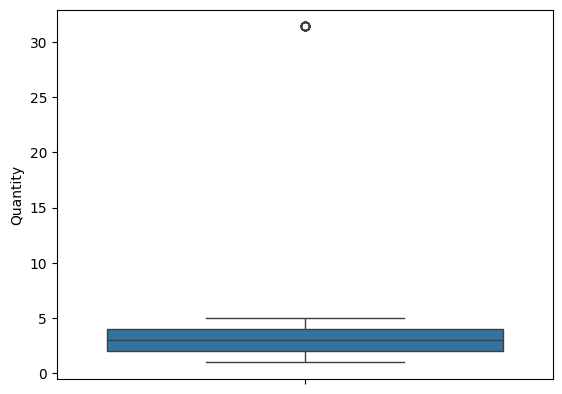

In [247]:
sns.boxplot(df['Quantity'])

In [248]:
outlier_quant,outlier_quant_index,lower_quant,upper_quant=outlier_det('Quantity')

for column: Quantity 
q1 : 2.0
q3 : 4.0
IQR : 2.0
outliers of Quantity is 1154     31.386909
2731     31.386909
2902     31.386909
3557     31.386909
4003     31.386909
4746     31.386909
5114     31.386909
5506     31.386909
6878     31.386909
6926     31.386909
7150     31.386909
8432     31.386909
9321     31.386909
11024    31.386909
11239    31.386909
Name: Quantity, dtype: float64


In [249]:
len(outlier_quant)

15

In [250]:
df['Quantity'].drop(index=outlier_quant_index,inplace=True)

<Axes: ylabel='Quantity'>

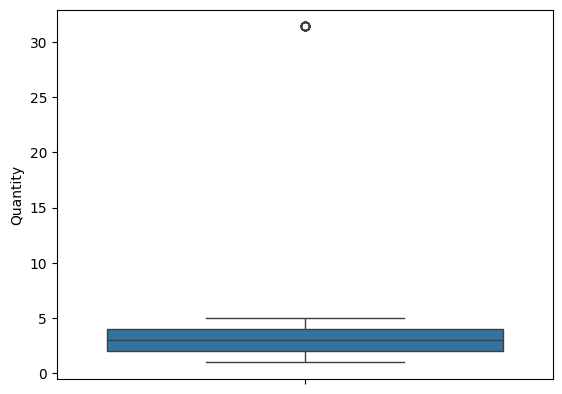

In [251]:
sns.boxplot(df['Quantity'])

In [252]:
numerical_cols

['Quantity', 'Unit_Price_INR', 'Total_Sales_INR', 'Review_Rating']

<Axes: ylabel='Unit_Price_INR'>

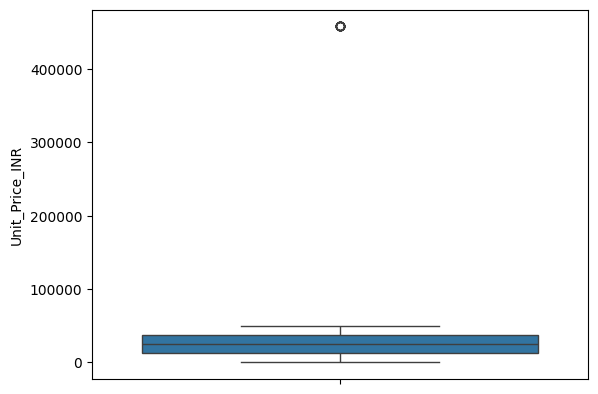

In [253]:
sns.boxplot(df['Unit_Price_INR'])

In [254]:
outlier_price,outlier_price_index,lower_price,upper_price=outlier_det('Unit_Price_INR')
print(outlier_price,outlier_price_index,lower_price,upper_price)

for column: Unit_Price_INR 
q1 : 13140.849999999999
q3 : 36964.555
IQR : 23823.705
outliers of Unit_Price_INR is 459      457574.131063
2178     457574.131063
3319     457574.131063
3612     457574.131063
5079     457574.131063
6182     457574.131063
7509     457574.131063
7779     457574.131063
9010     457574.131063
10067    457574.131063
12397    457574.131063
12688    457574.131063
13235    457574.131063
13677    457574.131063
14815    457574.131063
Name: Unit_Price_INR, dtype: float64
459      457574.131063
2178     457574.131063
3319     457574.131063
3612     457574.131063
5079     457574.131063
6182     457574.131063
7509     457574.131063
7779     457574.131063
9010     457574.131063
10067    457574.131063
12397    457574.131063
12688    457574.131063
13235    457574.131063
13677    457574.131063
14815    457574.131063
Name: Unit_Price_INR, dtype: float64 Index([  459,  2178,  3319,  3612,  5079,  6182,  7509,  7779,  9010, 10067,
       12397, 12688, 13235, 13677, 14815],
   

In [255]:
len(outlier_price)

15

In [256]:
df['Unit_Price_INR'].drop(outlier_price_index,inplace=True)

<Axes: ylabel='Unit_Price_INR'>

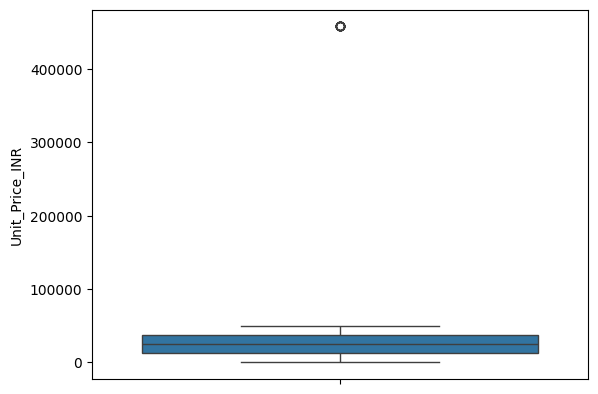

In [257]:
sns.boxplot(df['Unit_Price_INR'])

<Axes: ylabel='Review_Rating'>

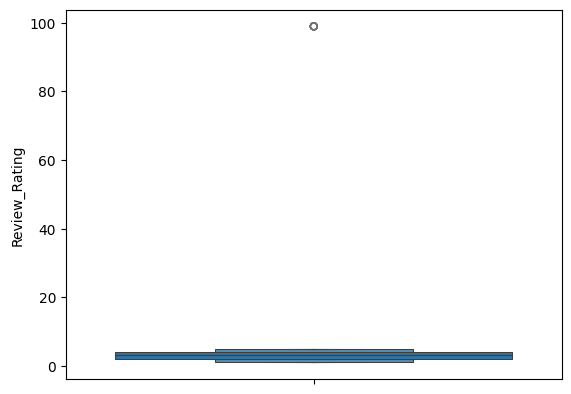

In [258]:
sns.boxenplot(df['Review_Rating'])

In [259]:
outlier_rating,outlier_rating_index,lower_rating,upper_rating=outlier_det('Review_Rating')

for column: Review_Rating 
q1 : 2.0
q3 : 4.0
IQR : 2.0
outliers of Review_Rating is 3130     99.0
3376     99.0
9191     99.0
9739     99.0
10179    99.0
11567    99.0
13927    99.0
Name: Review_Rating, dtype: float64


In [260]:
len(outlier_rating)

7

In [261]:
df.isnull().sum()

Order_ID            0
Date                0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price_INR      0
Total_Sales_INR     0
Payment_Method      0
Delivery_Status     0
Review_Rating       0
Review_Text         0
State               0
Country             0
dtype: int64

In [262]:
df.reset_index(drop=True)

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2.00000,25574.41,51148.8200,Credit Card,Returned,1.0,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1.00000,19361.41,19361.4100,Debit Card,Returned,5.0,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3.00000,24935.37,115428.6600,Cash on Delivery,Delivered,3.0,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5.00000,38145.72,190728.6000,Credit Card,Delivered,5.0,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5.00000,45940.98,226973.3275,UPI,Delivered,5.0,Highly recommend!,Odisha,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ORD114995,2025-04-12,CUST2822,Beauty,Lipstick,4.00000,36421.54,145686.1600,UPI,Delivered,1.0,Never buying again,Gujarat,India
14996,ORD114996,2025-08-29,CUST6143,Beauty,Shampoo,4.00000,18158.02,72632.0800,Debit Card,Delivered,4.0,Satisfied with the product,Meghalaya,India
14997,ORD114997,2025-01-27,CUST6747,Books,Science Textbook,1.00000,38864.05,38864.0500,UPI,Delivered,1.0,Waste of money,Sikkim,India
14998,ORD114998,2025-06-21,CUST2748,Beauty,Hair Dryer,3.00953,32658.62,97975.8600,Cash on Delivery,Pending,3.0,Okay product,Himachal Pradesh,India


In [263]:
df.isnull().sum()

Order_ID            0
Date                0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price_INR      0
Total_Sales_INR     0
Payment_Method      0
Delivery_Status     0
Review_Rating       0
Review_Text         0
State               0
Country             0
dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'Sikkim'),
  Text(1, 0, 'Telangana'),
  Text(2, 0, 'Nagaland'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Odisha'),
  Text(5, 0, 'Maharashtra'),
  Text(6, 0, 'Arunachal Pradesh'),
  Text(7, 0, 'Andhra Pradesh'),
  Text(8, 0, 'Gujarat'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Mizoram'),
  Text(11, 0, 'Punjab'),
  Text(12, 0, 'Tamil Nadu'),
  Text(13, 0, 'Rajasthan'),
  Text(14, 0, 'Manipur'),
  Text(15, 0, 'Himachal Pradesh'),
  Text(16, 0, 'Uttar Pradesh'),
  Text(17, 0, 'West Bengal'),
  Text(18, 0, 'Tripura'),
  Text(19, 0, 'Goa'),
  Text(20, 0, 'Karnataka'),
  Text(21, 0, 'Chhattisgarh'),
  Text(22, 0, 'Bihar'),
  Text(23, 0, 'Madhya Pradesh'),
  Text(24, 0, 'Kerala'),
  Text(25, 0, 'Jharkhand'),
  Text(26, 0, 'Uttarakhand'),
  Text(27, 0, 'Meghalaya')])

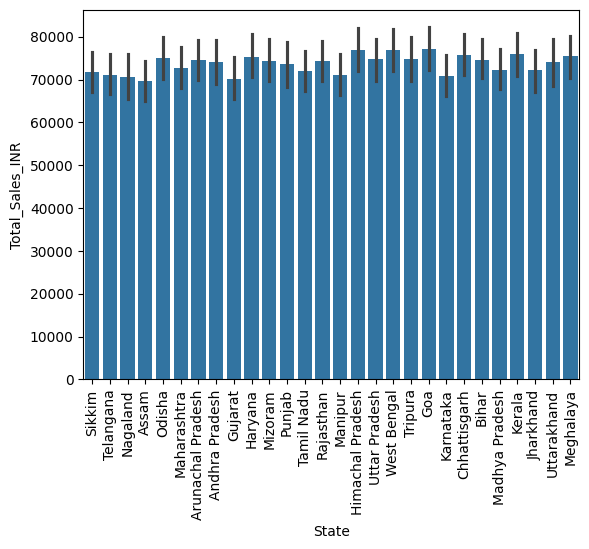

In [269]:
sns.barplot(x='State',y='Total_Sales_INR',data=df)
plt.xticks(rotation=90)